<h1>Submitted by, Sangeeth S V.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display
import math
sns.set(rc={'figure.figsize':(11.7,8.27)})

All essential libraries have been imported.

In [2]:
cars = pd.read_excel('Data_Train.xlsx')
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Renaming the series names to easier ones.

In [3]:
cars_cols = ['name','loc','year','kms','fuel','trans','owner','mileage','engine','power','seats','price']
cars.columns = cars_cols
cars.head()

,name,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats,price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


<h1>Data Summary

In [4]:
cars.shape

(6019, 12)

In [5]:
cars.dtypes

name        object
loc         object
year         int64
kms          int64
fuel        object
trans       object
owner       object
mileage     object
engine      object
power       object
seats      float64
price      float64
dtype: object

In [6]:
cars.describe()

,year,kms,seats,price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<h1> Data Cleaning

#### We're dropping all columns with more than 50% data as null

In [7]:
half_count=len(cars)/2;
cars=cars.dropna(thresh=half_count,axis=1)
cars.describe()

,year,kms,seats,price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


<h4> Checking whether any null values exist in the data set. If they do exist, they are not useful for our model.

In [8]:
null_count = cars.isnull().sum()
print(null_count)

name        0
loc         0
year        0
kms         0
fuel        0
trans       0
owner       0
mileage     2
engine     36
power      36
seats      42
price       0
dtype: int64


From the above calculation, we can see that there is no large amount of null values. So, we are free to remove the rows containing these null values

In [9]:
cars = cars.dropna()
cars.describe()

,year,kms,seats,price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


Now all the columns are of equal size

In [10]:
cars['name'] = cars.name.str.replace('Land Rover', 'Land-Rover')
cars['brandName'] = cars.name.str.split().str.get(0).str.capitalize()
cars.groupby('brandName').describe().price

,count,mean,std,min,25%,50%,75%,max
brandName,,,,,,,,
Ambassador,1.0,1.350000,NaN,1.35,1.3500,1.350,1.3500,1.35
Audi,236.0,25.537712,12.344783,7.50,17.5000,23.500,31.9475,72.94
Bentley,1.0,59.000000,NaN,59.00,59.0000,59.000,59.0000,59.00
Bmw,262.0,25.439618,15.236840,6.30,13.9500,21.415,32.6225,93.67
Chevrolet,121.0,3.044463,1.827563,0.75,1.7500,2.500,3.7000,9.87
Datsun,13.0,3.049231,0.476156,2.25,2.7000,3.100,3.3100,3.95
Fiat,25.0,3.340800,1.973058,0.55,2.2000,2.600,4.8500,7.71
Force,3.0,9.333333,2.309401,8.00,8.0000,8.000,10.0000,12.00
Ford,298.0,6.900067,7.531553,0.69,2.7500,5.345,7.3475,56.80


In [11]:
def modelSplit(carName):
    brand = carName.split()
    brandLength = len(brand[0])
    x = brand[1]
    if str.isnumeric(brand[1]):
        x = x + '-' + brand[2]
    return x

In [12]:
cars['modelName'] = cars['name'].astype('str')
cars['modelName'] = cars['modelName'].apply(modelSplit).str.lstrip()
cars.groupby('modelName').describe().price

,count,mean,std,min,25%,50%,75%,max
modelName,,,,,,,,
1-Series,3.0,16.740000,0.650231,16.00,16.5000,17.00,17.1100,17.22
1000-AC,1.0,0.850000,NaN,0.85,0.8500,0.85,0.8500,0.85
3-Series,98.0,18.138469,8.638399,6.30,10.5000,15.90,24.5600,37.92
5-Series,63.0,25.621111,11.995535,6.99,16.5350,23.29,33.5000,48.63
6-Series,7.0,45.737143,14.036193,20.72,44.5000,45.00,48.2500,68.94
...,...,...,...,...,...,...,...,...
Zen,29.0,1.386552,0.638471,0.45,0.9500,1.25,1.6500,2.70
Zest,21.0,4.615714,0.753516,3.70,4.0000,4.52,5.0000,6.69
i10,156.0,2.989167,0.772792,1.59,2.3150,2.95,3.5000,5.08


In [13]:
cars['carName'] = cars.brandName + ' ' + cars.modelName
cars.groupby('carName').describe().price

,count,mean,std,min,25%,50%,75%,max
carName,,,,,,,,
Ambassador Classic,1.0,1.350000,NaN,1.35,1.3500,1.350,1.3500,1.35
Audi A3,4.0,19.287500,2.465892,16.50,18.3000,19.075,20.0625,22.50
Audi A4,78.0,18.397051,6.600742,7.98,13.5000,17.870,23.9375,43.00
Audi A6,49.0,22.058163,8.929700,7.50,16.6700,21.560,25.0200,41.50
Audi A7,3.0,27.230000,2.018341,24.94,26.4700,28.000,28.3750,28.75
...,...,...,...,...,...,...,...,...
Volvo S60,7.0,19.501429,4.655500,12.00,16.8250,20.000,22.9300,25.00
Volvo S80,2.0,9.120000,2.644579,7.25,8.1850,9.120,10.0550,10.99
Volvo V40,4.0,20.500000,3.415650,16.00,19.0000,21.000,22.5000,24.00


In [14]:

# The following variables 'mileage','engine','power' are all numeric variables with an impact on price.
# However, their units make it hard to use in analysis or in our model
# So we are removing them in the following few lines

cars.mileage = cars.mileage.str.replace('km/kg','')
cars.mileage = cars.mileage.str.replace('kmpl','')
cars.mileage = cars.mileage.astype('float')
# 
cars.engine = cars.engine.str.replace('CC','')
cars.engine = cars.engine.astype('float')
# 
cars.power = cars.power.str.replace('null','0')
cars.power = cars.power.str.replace('bhp','')
cars.power = cars.power.astype('float')
# 
cars.head()

,name,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats,price,brandName,modelName,carName
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon,Maruti Wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta,Hyundai Creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz,Honda Jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti,Ertiga,Maruti Ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4,Audi A4


### Outlier Removal

##### Seats

In [15]:
cars.loc[cars['seats'] == 0.0,'seats'] = 5
cars['seats'].value_counts()

5.0     5013
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
Name: seats, dtype: int64

##### Kilometers Driven

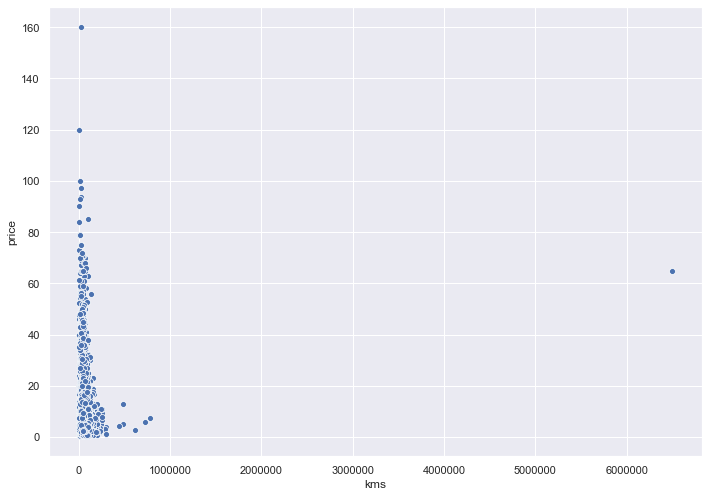

In [16]:
sns.scatterplot(x="kms",y="price",data=cars)
plt.show()

There is an outlier which we will now set to the mean value

In [17]:
cars.kms.max()

6500000

In [18]:
kms_mean = cars.kms.mean()
kms_mean

58674.3149790795

In [19]:
cars.loc[cars['kms'] == 6500000,'kms'] = kms_mean

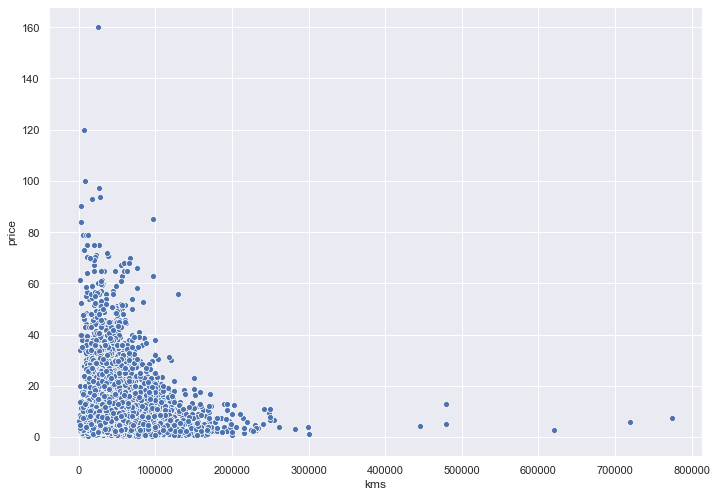

In [20]:
sns.scatterplot(x="kms",y="price",data=cars)
plt.show()

# Label Encoding

<h4> Rendering categorical variables into numerical values

    Changes to be made: 

    Owner_type
    Transmission
    Fuel_Type
    Location

    Year

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

mapping_dict={}

##### Owner Type

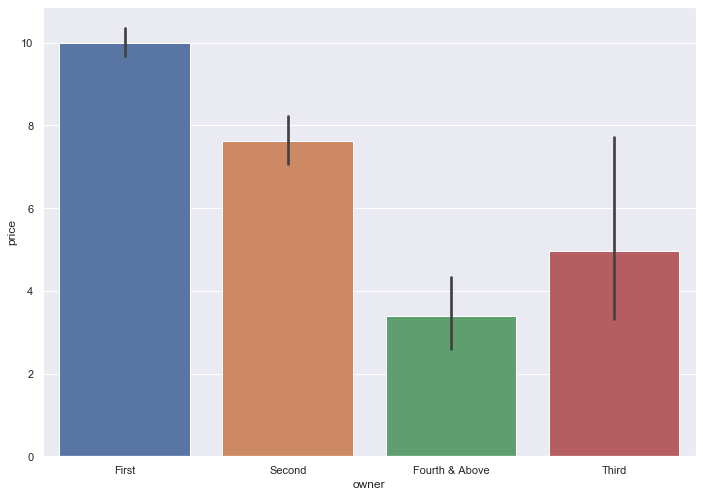

In [22]:
sns.barplot(x='owner',y='price',data=cars)
plt.show()

In [23]:
mapping_dict["owner"]={"First":3,"Second":2,"Third":1,"Fourth & Above":0}
mapping_dict

{'owner': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0}}

##### Transmission

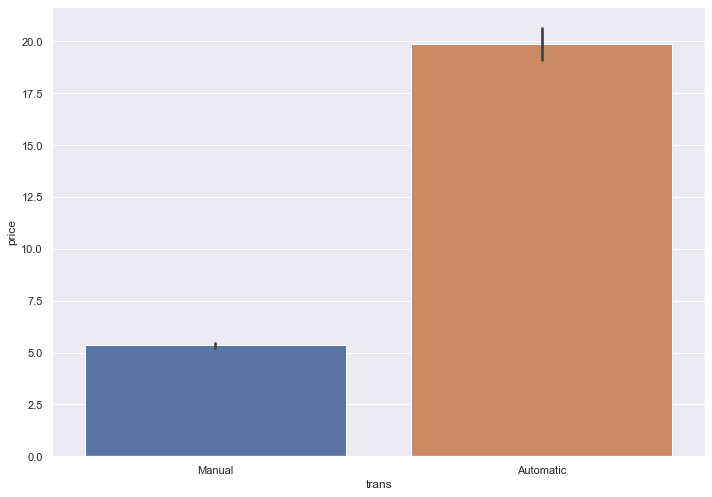

In [24]:
sns.barplot(x='trans',y='price',data=cars)
plt.show()

In [25]:
mapping_dict['trans'] = {"Manual":0,"Automatic":1}
mapping_dict

{'owner': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0},
 'trans': {'Manual': 0, 'Automatic': 1}}

##### Fuel

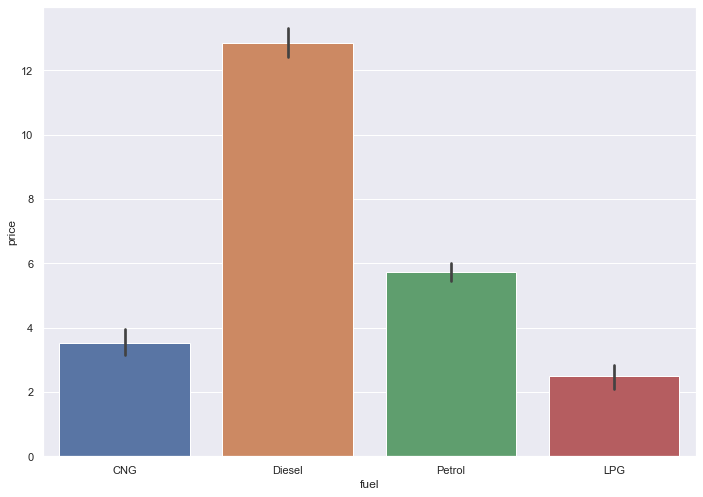

In [26]:
sns.barplot(x='fuel',y='price',data=cars)
plt.show()

In [27]:
mapping_dict['fuel'] = {"Diesel":3,"Petrol":2,"CNG":1,"LPG":0}
mapping_dict

{'owner': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0},
 'trans': {'Manual': 0, 'Automatic': 1},
 'fuel': {'Diesel': 3, 'Petrol': 2, 'CNG': 1, 'LPG': 0}}

##### Location

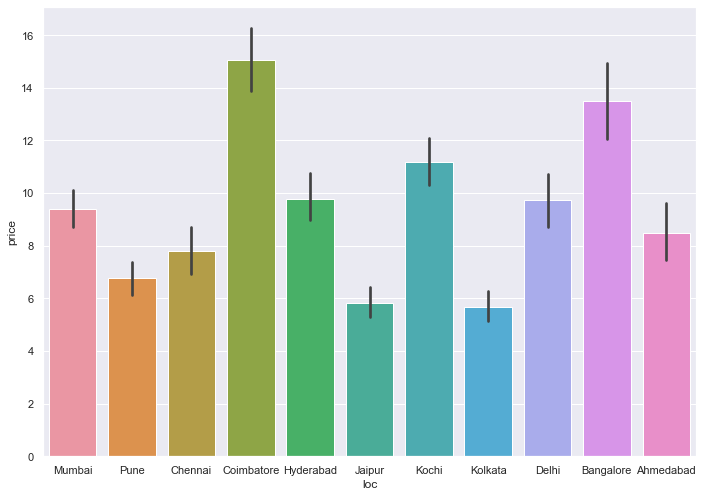

In [28]:
sns.barplot(x='loc',y='price',data=cars)
plt.show()

In [29]:
cars.groupby('loc').describe().price.sort_values(by='mean')

,count,mean,std,min,25%,50%,75%,max
loc,,,,,,,,
Kolkata,530.0,5.672491,6.970110,0.65,2.6200,3.750,5.8875,75.00
Jaipur,410.0,5.840146,5.906535,0.45,2.5000,4.250,6.5000,42.50
Pune,613.0,6.762121,7.598607,0.44,2.7500,4.340,7.5000,68.00
Chennai,490.0,7.780184,9.744867,0.65,2.8125,4.500,7.5000,70.00
Ahmedabad,223.0,8.482018,8.431641,0.75,3.8500,5.900,10.7000,85.00
Mumbai,784.0,9.406327,10.207518,0.55,3.7500,5.750,10.0000,75.00
Delhi,549.0,9.729107,11.573536,0.75,3.6000,5.500,11.0000,120.00
Hyderabad,741.0,9.781916,11.993158,0.60,3.5500,5.800,10.0000,160.00
Kochi,648.0,11.193164,11.861992,1.26,4.7875,6.720,11.7825,97.07


In [30]:
mapping_dict['loc'] = {'Kolkata':0, 'Jaipur':1, 'Pune':2, 'Chennai':3, 'Ahmedabad':4, 'Mumbai':5, 'Delhi':6, 'Hyderabad':7, 'Kochi':8, 'Bangalore':9, 'Coimbatore':10}
mapping_dict

{'owner': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0},
 'trans': {'Manual': 0, 'Automatic': 1},
 'fuel': {'Diesel': 3, 'Petrol': 2, 'CNG': 1, 'LPG': 0},
 'loc': {'Kolkata': 0,
  'Jaipur': 1,
  'Pune': 2,
  'Chennai': 3,
  'Ahmedabad': 4,
  'Mumbai': 5,
  'Delhi': 6,
  'Hyderabad': 7,
  'Kochi': 8,
  'Bangalore': 9,
  'Coimbatore': 10}}

#### Now, we will use this mapping dictionary with values sorted in the ascending order of price to replace the values in the car dataframe.

In [31]:
cars = cars.replace(mapping_dict)
cars['encLoc'] = cars['loc']
cars['encLoc'].astype('int')
cars['encOwner'] = cars.owner
cars['encFuel'] = cars.fuel
cars['encTrans'] = cars.trans
cars['encSeats'] = cars.seats
cars.describe()

,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats,price,encLoc,encOwner,encFuel,encTrans,encSeats
count,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000,5975.000000
mean,5.205021,2013.386778,57596.268839,2.522008,0.286025,2.799331,18.179408,1621.606695,111.324171,5.279665,9.501647,5.205021,2.799331,2.522008,0.286025,5.279665
std,3.118619,3.247238,37902.381276,0.527588,0.451939,0.453458,4.521801,601.036987,55.413209,0.806078,11.205736,3.118619,0.453458,0.527588,0.451939,0.806078
min,0.000000,1998.000000,171.000000,0.000000,0.000000,0.000000,0.000000,624.000000,0.000000,2.000000,0.440000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.000000,2012.000000,33908.000000,2.000000,0.000000,3.000000,15.200000,1198.000000,74.000000,5.000000,3.500000,2.000000,3.000000,2.000000,0.000000,5.000000
50%,5.000000,2014.000000,53000.000000,3.000000,0.000000,3.000000,18.160000,1493.000000,92.700000,5.000000,5.650000,5.000000,3.000000,3.000000,0.000000,5.000000
75%,8.000000,2016.000000,73000.000000,3.000000,1.000000,3.000000,21.100000,1984.000000,138.100000,5.000000,9.950000,8.000000,3.000000,3.000000,1.000000,5.000000
max,10.000000,2019.000000,775000.000000,3.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,160.000000,10.000000,3.000000,3.000000,1.000000,10.000000


##### Year

In [32]:
cars['encYear'] = le.fit_transform(cars['year'])
le.classes_

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

# Feature Scaling

In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler = MinMaxScaler(feature_range=(0,1))
standard_scaler = StandardScaler()

cars['encKms'] = min_max_scaler.fit_transform(np.array(cars.kms).reshape(-1,1))
cars['encMileage'] = min_max_scaler.fit_transform(np.array(cars.mileage).reshape(-1,1))
cars['encPower'] = min_max_scaler.fit_transform(np.array(cars.power).reshape(-1,1))
cars['encEngine'] = min_max_scaler.fit_transform(np.array(cars.engine).reshape(-1,1))

# Car Name Encoding

In [34]:
encCarName = pd.get_dummies(cars['carName'], drop_first=True)
encCarName.head(3)

,Audi A3,Audi A4,Audi A6,Audi A7,Audi A8,Audi Q3,Audi Q5,Audi Q7,Audi RS5,Audi TT,...,Volkswagen Jetta,Volkswagen Passat,Volkswagen Polo,Volkswagen Tiguan,Volkswagen Vento,Volvo S60,Volvo S80,Volvo V40,Volvo XC60,Volvo XC90
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
encBrandName = pd.get_dummies(cars['brandName'], drop_first=True)
encBrandName.head(3)

,Audi,Bentley,Bmw,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
encModelName = pd.get_dummies(cars['modelName'], drop_first=True)
encModelName.head(3)

,1000-AC,3-Series,5-Series,6-Series,7-Series,800-AC,800-DX,800-Std,A,A-Star,...,Xcent,Xenon,Xylo,Yeti,Z4,Zen,Zest,i10,i20,redi-GO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data

In [37]:
#Our Current cars dataframe
list(cars.columns)

['name',
 'loc',
 'year',
 'kms',
 'fuel',
 'trans',
 'owner',
 'mileage',
 'engine',
 'power',
 'seats',
 'price',
 'brandName',
 'modelName',
 'carName',
 'encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encSeats',
 'encYear',
 'encKms',
 'encMileage',
 'encPower',
 'encEngine']

#### Below, we're gong to take all the encoded independent variables from the cars dataframe and store them into a new dataframe

In [38]:
encCars = cars[['encLoc','encOwner','encFuel','encTrans','encYear','encKms','encMileage','encPower','encEngine','encSeats','price']]
list(encCars.columns)

['encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encYear',
 'encKms',
 'encMileage',
 'encPower',
 'encEngine',
 'encSeats',
 'price']

## Data Analysis

#### Firstly, we need too see how each variable affects price, our required dependent variable.
##### This can be efficiently done by using the heatmap.

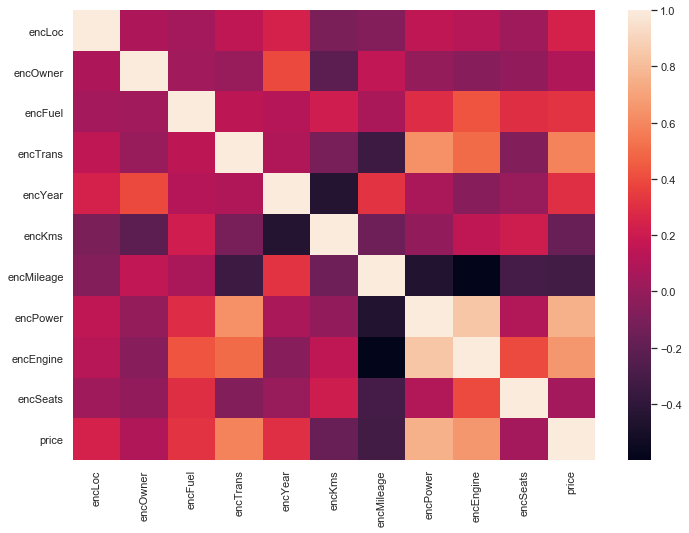

In [39]:
sns.heatmap(encCars.corr())

# ML Model Analysis

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Model

In [41]:
def single_iteration_linear_regression_model(data_to_model,price):
    X_train, X_test, Y_train, Y_test = train_test_split(data_to_model, price, test_size=0.20, random_state=1)
    
    model = LinearRegression().fit(X_train,Y_train)
    print("Model Score : ", model.score(X_test,Y_test))
    print("Intercept : ", model.intercept_)
    
    
    y_pred = model.predict(X_test)
    
    return [metrics.mean_absolute_error(Y_test, y_pred),metrics.mean_squared_error(Y_test, y_pred),np.sqrt(metrics.mean_squared_error(Y_test, y_pred)),metrics.r2_score(Y_test,y_pred),model]

In [42]:
def model1_details():
    [mae, mse, rmse, r2s, model] = single_iteration_linear_regression_model(X ,Y)
    print("Mean Absolute Error : ",mae)
    print("Mean Square Error : ",mse)
    print("Root Mean Square Error : ",rmse)
    print("R2 Score : ",r2s)
    return model

## Data 1
#### Model-Score : 0.7129729957477982

In [43]:
data = encCars
X = data.drop(['price'],axis=1)
Y = data.price

In [44]:
# Values passed to model
list(X.columns)

['encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encYear',
 'encKms',
 'encMileage',
 'encPower',
 'encEngine',
 'encSeats']

In [45]:
model = model1_details()

Model Score :  0.7254499652591047
Intercept :  -11.470070810212432
Mean Absolute Error :  3.8414596368326506
Mean Square Error :  34.27598528224667
Root Mean Square Error :  5.854569606917888
R2 Score :  0.7254499652591047


##### We are getting a pretty decent Model Score from our first try.  

## Data 2
#### Model- Score : 0.8373216977192798

Let us try using the full car name in the data

In [46]:
data = encCars
data = pd.concat([data, encCarName],axis=1)
X = data.drop(['price'],axis=1)
Y = data.price

In [47]:
#  Values passed to model
list(X.columns)

['encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encYear',
 'encKms',
 'encMileage',
 'encPower',
 'encEngine',
 'encSeats',
 'Audi A3',
 'Audi A4',
 'Audi A6',
 'Audi A7',
 'Audi A8',
 'Audi Q3',
 'Audi Q5',
 'Audi Q7',
 'Audi RS5',
 'Audi TT',
 'Bentley Continental',
 'Bmw 1-Series',
 'Bmw 3-Series',
 'Bmw 5-Series',
 'Bmw 6-Series',
 'Bmw 7-Series',
 'Bmw X1',
 'Bmw X3',
 'Bmw X5',
 'Bmw X6',
 'Bmw Z4',
 'Chevrolet Aveo',
 'Chevrolet Beat',
 'Chevrolet Captiva',
 'Chevrolet Cruze',
 'Chevrolet Enjoy',
 'Chevrolet Optra',
 'Chevrolet Sail',
 'Chevrolet Spark',
 'Chevrolet Tavera',
 'Datsun GO',
 'Datsun Redi',
 'Datsun redi-GO',
 'Fiat Avventura',
 'Fiat Grande',
 'Fiat Linea',
 'Fiat Petra',
 'Fiat Punto',
 'Fiat Siena',
 'Force One',
 'Ford Aspire',
 'Ford Classic',
 'Ford EcoSport',
 'Ford Ecosport',
 'Ford Endeavour',
 'Ford Fiesta',
 'Ford Figo',
 'Ford Freestyle',
 'Ford Fusion',
 'Ford Ikon',
 'Ford Mustang',
 'Honda Accord',
 'Honda Amaze',
 'Honda BR-V',
 'Honda BRV',
 'Ho

In [48]:
model = model1_details()

Model Score :  0.836904187938167
Intercept :  -9.939544718753682
Mean Absolute Error :  2.4480819354399075
Mean Square Error :  20.361569646506272
Root Mean Square Error :  4.51237959911467
R2 Score :  0.836904187938167


###### This data set gives a pretty good model score, low MSE and MAE. Altogether, a good model

## Data 3
#### Model- Score : 0.7947572149830407

Let us try now with only the car brand name

In [49]:
data = encCars
data = pd.concat([data, encBrandName],axis=1)
X = data.drop(['price'],axis=1)
Y = data.price

In [50]:
#  Values passed to model
list(X.columns)

['encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encYear',
 'encKms',
 'encMileage',
 'encPower',
 'encEngine',
 'encSeats',
 'Audi',
 'Bentley',
 'Bmw',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land-rover',
 'Mahindra',
 'Maruti',
 'Mercedes-benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [51]:
model = model1_details()

Model Score :  0.7947920477872252
Intercept :  -8.979101481045399
Mean Absolute Error :  2.903882899968079
Mean Square Error :  25.619026988953237
Root Mean Square Error :  5.061524176466338
R2 Score :  0.7947920477872252


###### The model score has decreased a bit, indicating that it is better to use the full car name and just not the brand name

### This means that it is better to use the full car name rather than just the brand name or just the model name

Now, according to the heatmap, there is not much correlation between the mileage and kilometers_driven with the price

In [52]:
encCars.corr()

,encLoc,encOwner,encFuel,encTrans,encYear,encKms,encMileage,encPower,encEngine,encSeats,price
encLoc,1.000000,0.088163,0.047566,0.155063,0.238275,-0.092945,-0.062060,0.153346,0.122169,0.031324,0.240283
encOwner,0.088163,1.000000,0.041903,0.008939,0.394100,-0.217429,0.161366,-0.001548,-0.051892,-0.013593,0.097054
encFuel,0.047566,0.041903,1.000000,0.145945,0.116432,0.215261,0.073006,0.293129,0.426345,0.299426,0.315453
encTrans,0.155063,0.008939,0.145945,1.000000,0.095812,-0.107435,-0.342504,0.635513,0.501056,-0.073954,0.586075
encYear,0.238275,0.394100,0.116432,0.095812,1.000000,-0.448746,0.314417,0.069787,-0.052538,0.011939,0.305800
encKms,-0.092945,-0.217429,0.215261,-0.107435,-0.448746,1.000000,-0.143095,-0.016418,0.154508,0.213145,-0.168099
encMileage,-0.062060,0.161366,0.073006,-0.342504,0.314417,-0.143095,1.000000,-0.453399,-0.598638,-0.311091,-0.313877
encPower,0.153346,-0.001548,0.293129,0.635513,0.069787,-0.016418,-0.453399,1.000000,0.842507,0.106941,0.759749
encEngine,0.122169,-0.051892,0.426345,0.501056,-0.052538,0.154508,-0.598638,0.842507,1.000000,0.397562,0.659117
encSeats,0.031324,-0.013593,0.299426,-0.073954,0.011939,0.213145,-0.311091,0.106941,0.397562,1.000000,0.053236


Our current model's model score is 0.8535656149204127 - Data 2

In [53]:
data = encCars
data = data.drop(['encKms','encMileage'],axis=1)
data = pd.concat([data, encCarName],axis=1)
X = data.drop(['price'],axis=1)
Y = data.price

In [54]:
#  Values passed to model
list(X.columns)

['encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encYear',
 'encPower',
 'encEngine',
 'encSeats',
 'Audi A3',
 'Audi A4',
 'Audi A6',
 'Audi A7',
 'Audi A8',
 'Audi Q3',
 'Audi Q5',
 'Audi Q7',
 'Audi RS5',
 'Audi TT',
 'Bentley Continental',
 'Bmw 1-Series',
 'Bmw 3-Series',
 'Bmw 5-Series',
 'Bmw 6-Series',
 'Bmw 7-Series',
 'Bmw X1',
 'Bmw X3',
 'Bmw X5',
 'Bmw X6',
 'Bmw Z4',
 'Chevrolet Aveo',
 'Chevrolet Beat',
 'Chevrolet Captiva',
 'Chevrolet Cruze',
 'Chevrolet Enjoy',
 'Chevrolet Optra',
 'Chevrolet Sail',
 'Chevrolet Spark',
 'Chevrolet Tavera',
 'Datsun GO',
 'Datsun Redi',
 'Datsun redi-GO',
 'Fiat Avventura',
 'Fiat Grande',
 'Fiat Linea',
 'Fiat Petra',
 'Fiat Punto',
 'Fiat Siena',
 'Force One',
 'Ford Aspire',
 'Ford Classic',
 'Ford EcoSport',
 'Ford Ecosport',
 'Ford Endeavour',
 'Ford Fiesta',
 'Ford Figo',
 'Ford Freestyle',
 'Ford Fusion',
 'Ford Ikon',
 'Ford Mustang',
 'Honda Accord',
 'Honda Amaze',
 'Honda BR-V',
 'Honda BRV',
 'Honda Brio',
 'Honda CR-V',


In [55]:
model = model1_details()

Model Score :  0.8361166153861189
Intercept :  -11.33965952635368
Mean Absolute Error :  2.4370451614072937
Mean Square Error :  20.459893528447058
Root Mean Square Error :  4.523261381840216
R2 Score :  0.8361166153861189


Even though there is little to no correlation for the Mileage and the Kilometers_driven, dropping these columns do not give a better result. In fact, the model score has decreased slightly.

# Improving the Model using Kfold Cross-Validation

In [56]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold

In [57]:
# Current model details
data = encCars
data = pd.concat([data, encCarName],axis=1)
X = data.drop(['price'],axis=1)
Y = data.price

In [58]:
def get_score(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    return model.score(X_test,Y_test)

Now, let us consider the cross validation scenario

In [59]:
k = [10,100]


for i in k:
    score_sum = 0
    folds = KFold(n_splits=i)
    for train,test in folds.split(X):
        X_train, X_test, Y_train, Y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]
        if get_score(LinearRegression(), X_train, X_test, Y_train, Y_test) > 0:
            score_sum = score_sum + get_score(LinearRegression(), X_train, X_test, Y_train, Y_test)
    print("K : " + str(i) + ", Score : "+ str(score_sum/i))

K : 10, Score : 0.3235345804853039
K : 100, Score : 0.7520719892703264


#### K=1 is our best option from what the above calculation

## Using Random Forest Regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [62]:
data = encCars
data = pd.concat([data, encBrandName],axis=1)
X = data.drop(['price'],axis=1)
Y = data.price

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [64]:
regressor.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [65]:
regressor.score(X_test, Y_test)

0.9159727393066461

In [66]:
y_pred = regressor.predict(X_test)

In [67]:
metrics.r2_score(y_pred,Y_test)

0.9052663902707143

## Random Forest Regression Works the best
Now, we need to figure out what optimum number to set as the number of estimators

In [68]:
def rfrmodel(estimators, X_data, Y_data):
    model = RandomForestRegressor(n_estimators=estimators, random_state=0)
    
    X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.2, random_state=0)
    
    model.fit(X_train, Y_train)
    
    y_pred_estimators = model.predict(X_test)
    
    return [model.score(X_test, Y_test), metrics.r2_score(y_pred_estimators, Y_test)]

In [69]:
x = [50, 75, 100, 200]
modelscores = []
r2scores = []

In [70]:
data = encCars
data = pd.concat([data, encBrandName],axis=1)
X = data.drop(['price'],axis=1)
Y = data.price

In [71]:
for i in x:
    [model_score, r2Score] = rfrmodel(i, X, Y)
    modelscores.append(model_score)
    r2scores.append(r2Score)

In [72]:
print(x)
print(modelscores)
print(r2scores)

[50, 75, 100, 200]
[0.9099684009994329, 0.9144013604691312, 0.9159727393066461, 0.916545498313619]
[0.8952009008773383, 0.9021039934715074, 0.9052663902707143, 0.9060856384553541]


<p> From above calculations, the model works best when number of estimators is <strong>100</strong> giving an R2_score of about 0.91

# Test Data Preparation

In [73]:
cars_test = pd.read_excel("Data_Test.xlsx")

In [74]:
cars_test.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0


#### Renaming columns

In [75]:
cars_cols

['name',
 'loc',
 'year',
 'kms',
 'fuel',
 'trans',
 'owner',
 'mileage',
 'engine',
 'power',
 'seats',
 'price']

In [76]:
cars_cols.remove('price')

In [77]:
cars_cols

['name',
 'loc',
 'year',
 'kms',
 'fuel',
 'trans',
 'owner',
 'mileage',
 'engine',
 'power',
 'seats']

In [78]:
cars_test.columns = cars_cols
cars_test.head()

,name,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0


#### Data Summary

In [79]:
cars_test.shape

(1234, 11)

In [80]:
cars_test.describe()

,year,kms,seats
count,1234.000000,1234.000000,1223.000000
mean,2013.400324,58507.288493,5.284546
std,3.179700,35598.702098,0.825622
min,1996.000000,1000.000000,2.000000
25%,2011.000000,34000.000000,5.000000
50%,2014.000000,54572.500000,5.000000
75%,2016.000000,75000.000000,5.000000
max,2019.000000,350000.000000,10.000000


In [81]:
cars_test.isna().sum()

name        0
loc         0
year        0
kms         0
fuel        0
trans       0
owner       0
mileage     0
engine     10
power      10
seats      11
dtype: int64

#### Label Encoding

In [82]:
mapping_dict

{'owner': {'First': 3, 'Second': 2, 'Third': 1, 'Fourth & Above': 0},
 'trans': {'Manual': 0, 'Automatic': 1},
 'fuel': {'Diesel': 3, 'Petrol': 2, 'CNG': 1, 'LPG': 0},
 'loc': {'Kolkata': 0,
  'Jaipur': 1,
  'Pune': 2,
  'Chennai': 3,
  'Ahmedabad': 4,
  'Mumbai': 5,
  'Delhi': 6,
  'Hyderabad': 7,
  'Kochi': 8,
  'Bangalore': 9,
  'Coimbatore': 10}}

In [83]:
cars_test = cars_test.replace(mapping_dict)

In [84]:
cars_test['year'] = le.fit_transform(cars_test['year'])
le.classes_

array([1996, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [85]:
cars_test.head()

,name,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats
0,Maruti Alto K10 LXI CNG,6,14,40929,1,0,3,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti Alto 800 2016-2019 LXI,10,13,54493,2,0,2,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota Innova Crysta Touring Sport 2.4 MT,5,17,34000,3,0,3,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota Etios Liva GD,7,12,139000,3,0,3,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai i20 Magna,5,14,29000,2,0,3,18.5 kmpl,1197 CC,82.85 bhp,5.0


#### Modifying the categorical data : Name of car

In [86]:
def modelSplit(carName):
    brand = carName.split()
    brandLength = len(brand[0])
    x = brand[1]
    if str.isnumeric(brand[1]):
        x = x + '-' + brand[2]
    return x

In [87]:
cars_test['name'] = cars_test.name.str.replace('Land Rover', 'Land-Rover')

In [88]:
cars_test['name'] = cars_test.name.str.split().str.get(0).str.capitalize()
#  + ' ' + cars_test['name'].astype('str').apply(modelSplit).str.lstrip()

In [89]:
cars_test.head()

,name,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats
0,Maruti,6,14,40929,1,0,3,32.26 km/kg,998 CC,58.2 bhp,4.0
1,Maruti,10,13,54493,2,0,2,24.7 kmpl,796 CC,47.3 bhp,5.0
2,Toyota,5,17,34000,3,0,3,13.68 kmpl,2393 CC,147.8 bhp,7.0
3,Toyota,7,12,139000,3,0,3,23.59 kmpl,1364 CC,null bhp,5.0
4,Hyundai,5,14,29000,2,0,3,18.5 kmpl,1197 CC,82.85 bhp,5.0


In [90]:
len(cars_test.name.value_counts())

28

In [91]:
cars_test.mileage = cars_test.mileage.str.replace('km/kg','')
cars_test.mileage = cars_test.mileage.str.replace('kmpl','')
cars_test.mileage = cars_test.mileage.astype('float')

cars_test.engine = cars_test.engine.str.replace('CC','')
cars_test.engine = cars_test.engine.astype('float')
 
cars_test.power = cars_test.power.str.replace('null','0')
cars_test.power = cars_test.power.str.replace('bhp','')
cars_test.power = cars_test.power.astype('float')

cars_test.head()

,name,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats
0,Maruti,6,14,40929,1,0,3,32.26,998.0,58.20,4.0
1,Maruti,10,13,54493,2,0,2,24.70,796.0,47.30,5.0
2,Toyota,5,17,34000,3,0,3,13.68,2393.0,147.80,7.0
3,Toyota,7,12,139000,3,0,3,23.59,1364.0,0.00,5.0
4,Hyundai,5,14,29000,2,0,3,18.50,1197.0,82.85,5.0


In [92]:
cars_test.seats = cars_test.seats.fillna(value=math.floor(cars_test.seats.mean()))

In [93]:
cars_test.seats.value_counts()

5.0     1044
7.0      122
8.0       36
4.0       20
6.0        7
10.0       3
2.0        2
Name: seats, dtype: int64

In [94]:
cars_test = cars_test.fillna(value=cars_test.mean())

The seats also have normal values

In [95]:
newCarName = pd.get_dummies(cars_test['name'])
newCarName.head(3)

,Audi,Bentley,Bmw,Chevrolet,Datsun,Fiat,Ford,Hindustan,Honda,Hyundai,...,Mitsubishi,Nissan,Opelcorsa,Porsche,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [96]:
cars_test = cars_test.drop(['name'],axis=1)

In [97]:
cars_test.head(3)

,loc,year,kms,fuel,trans,owner,mileage,engine,power,seats
0,6,14,40929,1,0,3,32.26,998.0,58.2,4.0
1,10,13,54493,2,0,2,24.70,796.0,47.3,5.0
2,5,17,34000,3,0,3,13.68,2393.0,147.8,7.0


In [98]:
cars_test = pd.concat([cars_test,newCarName],axis=1)

In [99]:
list(cars_test.columns)

['loc',
 'year',
 'kms',
 'fuel',
 'trans',
 'owner',
 'mileage',
 'engine',
 'power',
 'seats',
 'Audi',
 'Bentley',
 'Bmw',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Ford',
 'Hindustan',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Land-rover',
 'Mahindra',
 'Maruti',
 'Mercedes-benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Opelcorsa',
 'Porsche',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

#### Feature Scaling

In [100]:
cars_test.dtypes.value_counts()

uint8      28
int64       6
float64     4
dtype: int64

In [101]:
cars_test['kms'] = min_max_scaler.fit_transform(np.array(cars_test.kms).reshape(-1,1))
cars_test['mileage'] = min_max_scaler.fit_transform(np.array(cars_test.mileage).reshape(-1,1))
cars_test['power'] = min_max_scaler.fit_transform(np.array(cars_test.power).reshape(-1,1))
cars_test['engine'] = min_max_scaler.fit_transform(np.array(cars_test.engine).reshape(-1,1))

Rename the columns of test data set to the same names as train dataset

In [102]:
cars_test['encLoc'] = cars_test['loc']
cars_test['encKms'] = cars_test['kms']
cars_test['encOwner'] = cars_test['owner']
cars_test['encSeats'] = cars_test['seats']
cars_test['encYear'] = cars_test['year']
cars_test['encFuel'] = cars_test['fuel']
cars_test['encTrans'] = cars_test['trans']
cars_test['encMileage'] = cars_test['mileage']
cars_test['encPower'] = cars_test['power']
cars_test['encEngine'] = cars_test['engine']

In [103]:
cars_test = cars_test.drop(['power','engine','seats','mileage','trans','owner','year','fuel','loc','kms'], axis=1)

In [104]:
data = encCars
data = pd.concat([data, encBrandName],axis=1)
print(data.shape)
data.tail(1)

(5975, 40)


,encLoc,encOwner,encFuel,encTrans,encYear,encKms,encMileage,encPower,encEngine,encSeats,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
6018,7,3,3,0,13,0.060438,0.758497,0.102857,0.058057,5.0,...,0,0,0,0,0,0,0,0,0,0


In [105]:
data = pd.concat([data, cars_test],axis=0)
print(data.shape)
data.head(1)

(7209, 42)


,encLoc,encOwner,encFuel,encTrans,encYear,encKms,encMileage,encPower,encEngine,encSeats,...,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,Hindustan,Opelcorsa
0,5,3,1,0,12,0.092703,0.793083,0.103857,0.069594,5.0,...,0,0,0,0.0,0,0,0,0,NaN,NaN


In [106]:
data.tail(1)

,encLoc,encOwner,encFuel,encTrans,encYear,encKms,encMileage,encPower,encEngine,encSeats,...,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo,Hindustan,Opelcorsa
1233,8,3,3,1,14,0.204708,0.309981,0.275974,0.283588,5.0,...,0,0,0,NaN,0,0,0,0,0.0,0.0


In [107]:
list(data.columns)

['encLoc',
 'encOwner',
 'encFuel',
 'encTrans',
 'encYear',
 'encKms',
 'encMileage',
 'encPower',
 'encEngine',
 'encSeats',
 'price',
 'Audi',
 'Bentley',
 'Bmw',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land-rover',
 'Mahindra',
 'Maruti',
 'Mercedes-benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'Hindustan',
 'Opelcorsa']

In [108]:
data.isna().sum().sum()

16886

Filling all the resultant NaN values with 0

In [109]:
data = data.fillna(value=0)

In [110]:
data.isna().sum().sum()

0

Now, our data is in the combination of our train and test data.

In [111]:
data = data.drop(['Hindustan','Opelcorsa'], axis=1)

### Our Model

In [112]:
X = data.drop(['price'],axis=1)
Y = data.price

In [113]:
X_train = X.loc[:6018]
X_train.shape

(5975, 39)

In [114]:
Y_train = Y.loc[:6018]
Y_train.shape

(5975,)

In [115]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231, 1232, 1233],
           dtype='int64', length=7209)

In [116]:
train_data, test_data = data.index[0:5975], data.index[-1234:]

Y_test is not required as it is going to be just some zeroes

In [117]:
X_train, X_test, Y_train = X.iloc[train_data], X.iloc[test_data], Y.iloc[train_data]

In [118]:
model = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train, Y_train)
model.score(X_train,Y_train)

0.9842098325674612

In [119]:
y_pred = model.predict(X_test)
y_pred = np.absolute(y_pred)

In [120]:
# The cars_test dataframe was modified 
list(cars_test.columns)

['Audi',
 'Bentley',
 'Bmw',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Ford',
 'Hindustan',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Land-rover',
 'Mahindra',
 'Maruti',
 'Mercedes-benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'Opelcorsa',
 'Porsche',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo',
 'encLoc',
 'encKms',
 'encOwner',
 'encSeats',
 'encYear',
 'encFuel',
 'encTrans',
 'encMileage',
 'encPower',
 'encEngine']

So, i'm reading the data_test dataset once again before appending our predicted prices inside it.

In [121]:
test_data = pd.read_excel("Data_Test.xlsx")

In [122]:
test_data['Price'] = y_pred

In [123]:
test_data.to_excel("Data_Test_Result.xlsx")

In [124]:
test_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,1.7538
1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,12.1985
2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,4.0543
3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,5.9918
4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,17.2387


The data has been stored in another file, Data_Test_Result.xlsx